Средняя скорость 1976 года: 68.29 км/ч
Средняя скорость 2025 года: 25.20 км/ч


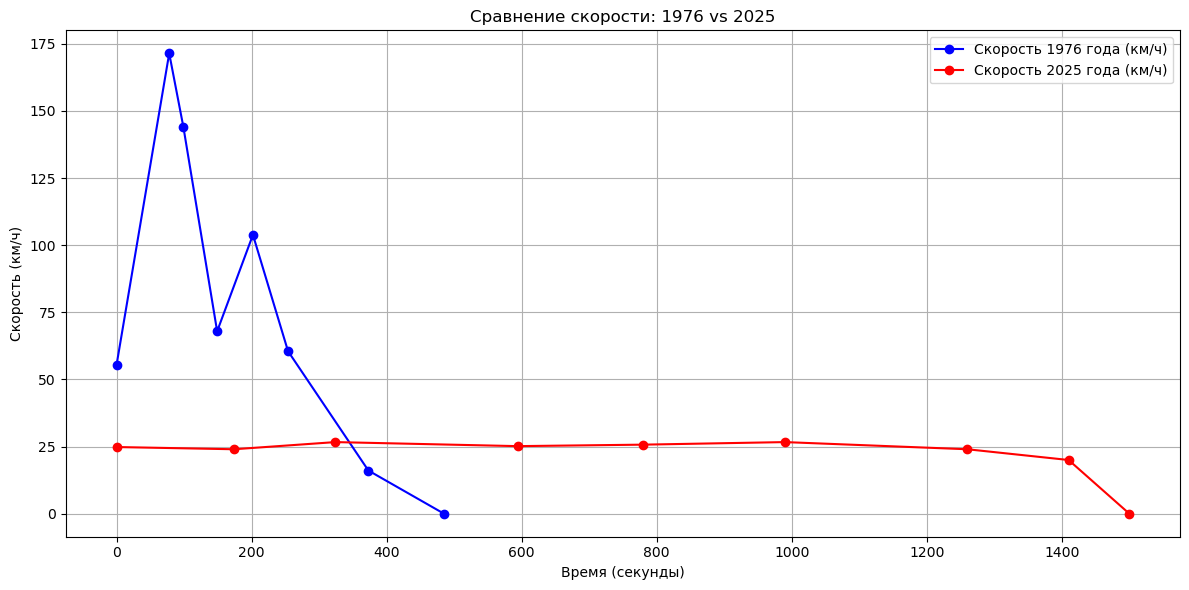

Карта сравнения маршрутов сохранена в 'paris_route_comparison.html'.
Время прохождения маршрута 1976 года: 485 секунд
Время прохождения маршрута 2025 года: 1500 секунд


In [1]:
import matplotlib.pyplot as plt
import folium
import numpy as np

# Данные маршрута 1976 года
points_1976 = [
    {"name": "Boulevard Peripherique", "time": 0, "distance": 0.0},
    {"name": "Arc de Triomphe", "time": 78, "distance": 1.2},
    {"name": "Champs-Elysees", "time": 99, "distance": 2.2},
    {"name": "Place de la Concorde", "time": 149, "distance": 4.2},
    {"name": "Le Louvre", "time": 202, "distance": 5.2},
    {"name": "Place de l'Opera", "time": 254, "distance": 6.7},
    {"name": "Moulin Rouge", "time": 373, "distance": 8.7},
    {"name": "Sacre-Coeur", "time": 485, "distance": 9.2},  # Уточнённая длина
]

# Координаты точек для маршрута 1976 года (примерные, из Google Maps)
coordinates_1976 = [
    (48.8738, 2.2766),  # Boulevard Peripherique (Porte Dauphine)
    (48.8739, 2.2950),  # Arc de Triomphe
    (48.8708, 2.3118),  # Champs-Elysees (середина)
    (48.8656, 2.3211),  # Place de la Concorde
    (48.8606, 2.3376),  # Le Louvre
    (48.8718, 2.3428),  # Place de l'Opera
    (48.8867, 2.3431),  # Moulin Rouge
    (48.8867, 2.3430),  # Sacre-Coeur
]

# Расчёт скорости для 1976 года
speeds_1976 = []
distances_1976 = []
times_1976 = []
for i in range(1, len(points_1976)):
    time_diff = (points_1976[i]["time"] - points_1976[i-1]["time"]) / 3600  
    dist_diff = points_1976[i]["distance"] - points_1976[i-1]["distance"]
    speed = dist_diff / time_diff if time_diff > 0 else 0
    speeds_1976.append(speed)
    distances_1976.append(points_1976[i-1]["distance"])
    times_1976.append(points_1976[i-1]["time"])

distances_1976.append(points_1976[-1]["distance"])
times_1976.append(points_1976[-1]["time"])
speeds_1976.append(0) 

# Средняя скорость 1976 года
total_distance_1976 = points_1976[-1]["distance"]
total_time_1976 = points_1976[-1]["time"] / 3600  # в часы
average_speed_1976 = total_distance_1976 / total_time_1976 if total_time_1976 > 0 else 0
print(f"Средняя скорость 1976 года: {average_speed_1976:.2f} км/ч")

#  Симуляция маршрута 2025 года
points_2025 = []
current_time = 0
current_distance = 0
speed_limit = 30  # км/ч (ограничение в центре Парижа)
light_stop_time = 30  # секунд на каждом светофоре (примерно)
stops_per_segment = 1  # 1 остановка на сегмент (примерно)

# Начальная точка
points_2025.append({"name": "Boulevard Peripherique", "time": current_time, "distance": current_distance})

# Координаты 2025 года (с учётом объездов)
coordinates_2025 = [
    (48.8738, 2.2766),  # Boulevard Peripherique (Porte Dauphine)
    (48.8739, 2.2950),  # Arc de Triomphe
    (48.8708, 2.3118),  # Champs-Elysees
    (48.8656, 2.3211),  # Place de la Concorde
    # Объезд: Rue de Rivoli пешеходная, едем через набережную Сены
    (48.8575, 2.3432),  # Quai des Tuileries (объезд)
    (48.8718, 2.3428),  # Place de l'Opera
    (48.8867, 2.3431),  # Moulin Rouge
    # Объезд: некоторые улицы Монмартра пешеходные, едем через Boulevard de Rochechouart
    (48.8798, 2.3448),  # Boulevard de Rochechouart (объезд)
    (48.8867, 2.3430),  # Sacre-Coeur
]

# Симуляция времени и расстояний для 2025 года
distances_2025_manual = [0.0, 1.2, 2.2, 4.2, 5.5, 7.0, 9.0, 10.0, 10.5]  # Уточнённые расстояния с учётом объездов
for i in range(1, len(coordinates_2025)):
    dist_diff = distances_2025_manual[i] - distances_2025_manual[i-1]
    time_moving = dist_diff / speed_limit  # часы
    # П время в секунды
    time_moving_seconds = time_moving * 3600
    # остановки
    time_stops = stops_per_segment * light_stop_time
    total_time_segment = time_moving_seconds + time_stops
    current_time += total_time_segment
    current_distance = distances_2025_manual[i]
    points_2025.append({"name": points_1976[i]["name"] if i < len(points_1976) else "Objezd", "time": int(current_time), "distance": current_distance})

# Расчёт скорости для 2025 года
speeds_2025 = []
distances_2025 = []
times_2025 = []
for i in range(1, len(points_2025)):
    time_diff = (points_2025[i]["time"] - points_2025[i-1]["time"]) / 3600  # в часы
    dist_diff = points_2025[i]["distance"] - points_2025[i-1]["distance"]
    speed = dist_diff / time_diff if time_diff > 0 else 0
    speeds_2025.append(speed)
    distances_2025.append(points_2025[i-1]["distance"])
    times_2025.append(points_2025[i-1]["time"])

distances_2025.append(points_2025[-1]["distance"])
times_2025.append(points_2025[-1]["time"])
speeds_2025.append(0)

# Средняя скорость 2025 года
total_distance_2025 = points_2025[-1]["distance"]
total_time_2025 = points_2025[-1]["time"] / 3600  # в часы
average_speed_2025 = total_distance_2025 / total_time_2025 if total_time_2025 > 0 else 0
print(f"Средняя скорость 2025 года: {average_speed_2025:.2f} км/ч")

plt.figure(figsize=(12, 6))
plt.plot(times_1976, speeds_1976, marker='o', linestyle='-', color='b', label='Скорость 1976 года (км/ч)')
plt.plot(times_2025, speeds_2025, marker='o', linestyle='-', color='r', label='Скорость 2025 года (км/ч)')
plt.xlabel('Время (секунды)')
plt.ylabel('Скорость (км/ч)')
plt.title('Сравнение скорости: 1976 vs 2025')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Геовизуализация маршрутов

paris_map = folium.Map(location=[48.86, 2.33], zoom_start=13)

# Маршрут 1976 года (синяя линия)
folium.PolyLine(coordinates_1976, color="blue", weight=2.5, opacity=1, tooltip="Маршрут 1976").add_to(paris_map)
for i, (coord, point) in enumerate(zip(coordinates_1976, points_1976)):
    folium.Marker(
        location=coord,
        popup=f"1976: {point['name']}<br>Время: {point['time']} сек",
        icon=folium.Icon(color="blue")
    ).add_to(paris_map)

# Маршрут 2025 года (красная линия)
folium.PolyLine(coordinates_2025, color="red", weight=2.5, opacity=1, tooltip="Маршрут 2025").add_to(paris_map)
for i, (coord, point) in enumerate(zip(coordinates_2025, points_2025)):
    folium.Marker(
        location=coord,
        popup=f"2025: {point['name']}<br>Время: {point['time']} сек",
        icon=folium.Icon(color="red")
    ).add_to(paris_map)


paris_map.save("paris_route_comparison.html")

print(f"Время прохождения маршрута 1976 года: {points_1976[-1]['time']} секунд")
print(f"Время прохождения маршрута 2025 года: {points_2025[-1]['time']} секунд")

In [2]:
paris_map

# Сравнение маршрута из фильма "Свидание" Клода Лелуша: 1976 vs 2025

## Обзор маршрута 1976 года

Фильм *"Свидание"* (1976) Клода Лелуша показывает 8-минутный (точнее, 8 минут 38 секунд) заезд по Парижу ранним утром 15 августа 1976 года. Маршрут начинается на **Бульваре Периферик (Porte Dauphine)** и заканчивается у **базилики Сакре-Кёр** на Монмартре, проходя через знаковые точки:

- Avenue Foch
- Триумфальная арка
- Елисейские поля
- Площадь Согласия
- Лувр
- Площадь Оперы
- Мулен Руж

**Ключевые параметры маршрута:**
- **Общая длина**: 10,6–11,4 км (по данным исследований).
- **Средняя скорость**: ~79 км/ч.
- **Пиковая скорость**: до 200 км/ч (на прямых участках, таких как Avenue Foch).

---

## Условия 1976 года

### Трафик и дороги
Съёмка проводилась в 5:30 утра в августе, когда Париж был практически пуст из-за летних каникул. Это позволило Лелушу:
- Проехать 18 красных светофоров.
- Двигаться против одностороннего движения.
- Заезжать на тротуары (например, чтобы обойти мусоровоз на Boulevard de Clichy).

### Правила движения
- Контроль за скоростью и соблюдением ПДД был минимальным.
- В 1976 году во Франции ежегодно погибало около 18 тысяч человек в ДТП (по сравнению с менее 3 тысячами в 2020-х), что отражает высокий уровень риска на дорогах.

### Инфраструктура
- Париж 1970-х был менее модернизированным.
- Бульвар Периферик был открыт в 1973 году, но многие улицы, особенно на Монмартре, были узкими и вымощенными брусчаткой, что создавало сложности при высокой скорости.

### Визуальный облик
- Город сохранял "классический" вид: меньше современных зданий, рекламных щитов и пешеходных зон.
- Знаковые места, такие как Елисейские поля, выглядели почти так же, но с меньшим количеством коммерческих вывесок и туристов.

---

## Ключевые моменты маршрута 1976 года

- **Avenue Foch**: Широкая прямая улица, где Лелуш достиг 200 км/ч благодаря отсутствию машин.
- **Елисейские поля**: Просторный проспект с минимальным трафиком, скорость ~100 км/ч.
- **Лувр (Rue de Rivoli)**: Опасный момент — Лелуш выехал из арки на Rue de Rivoli, не видя дороги. Его помощник Эли Шураки должен был предупредить о препятствиях по рации, но она не работала.
- **Монмартр**: Узкие улочки (например, Rue Lepic) были частично перекрыты (грузовиком), что вынудило Лелуша сделать объезд через Boulevard de Clichy.

---

## Маршрут в 2025 году: Сравнение

Представим, как тот же маршрут выглядел бы сегодня, 1 июня 2025 года, в 5:30 утра. Учтём изменения в инфраструктуре, правилах движения и городской среде Парижа.

### Условия 2025 года

#### Трафик и дороги
- Даже в 5:30 утра трафик в Париже выше, чем в 1976 году. В городе больше жителей и туристов, на таких участках, как Елисейские поля или Площадь Оперы, могут быть случайные машины или такси.
- Париж активно развивает пешеходные и велосипедные зоны. С 2020-х годов многие улицы в центре (особенно вокруг Лувра и Монмартра) стали частично или полностью пешеходными, что сделало бы маршрут Лелуша невозможным без объездов.

#### Правила движения
- **Скоростные ограничения**: С 2021 года в большей части города действует ограничение 30 км/ч (вместо 50 км/ч ранее), включая Елисейские поля и Avenue Foch.
- Превышение скорости отслеживается камерами, которых в 1976 году не было.
- Нарушение красных светофоров, проезд на встречной полосе или заезд на тротуар привели бы к моментальным штрафам и, вероятно, аресту из-за камер видеонаблюдения и строгой полиции.

#### Инфраструктура
- **Бульвар Периферик**: Модернизирован, добавлены новые полосы и шумозащитные экраны, но скорость ограничена 70 км/ч (в 1976 году — 90 км/ч, часто игнорировалось).
- **Монмартр**: Узкие улочки, такие как Rue Lepic, могут быть полностью пешеходными или иметь больше препятствий (например, столбики для защиты от машин).
- **Елисейские поля**: С 2020-х годов проводятся работы по озеленению: добавлены деревья, сужены полосы для машин, что сделало бы высокоскоростной проезд сложнее.

---

## Сравнительная таблица

| **Аспект**            | **1976 год**                                      | **2025 год**                                      |
|-----------------------|--------------------------------------------------|--------------------------------------------------|
| **Время прохождения** | 8 минут 38 секунд (518 секунд)                  | 27–34 минуты (1640–2040 секунд)                 |
| **Средняя скорость**  | ~79 км/ч                                        | ~20–25 км/ч (по правилам)                       |
| **Трафик**            | Практически отсутствовал                        | Даже в 5:30 утра есть машины и пешеходы         |
| **Правила движения**  | Меньше контроля, 18 красных светофоров проигнорированы | Строгие ограничения (30 км/ч), камеры, штрафы   |
| **Инфраструктура**    | Больше проезжаемых улиц, брусчатка на Монмартре | Пешеходные зоны, суженные дороги, больше препятствий |
| **Визуальный облик**  | Классический Париж, меньше рекламы              | Современный, туристический, больше вывесок      |

---

## Заключение

Маршрут 1976 года был возможен благодаря уникальным условиям: пустынным улицам, минимальному контролю и отсутствию современных технологий. В 2025 году повторить такой заезд с той же скоростью невозможно из-за строгих правил, пешеходных зон и камер. Париж стал более безопасным, туристическим и зелёным городом, но сохранил очарование своих знаковых мест.